In [1]:
import networkx as nx
import numpy as np

import arquin

# Modules

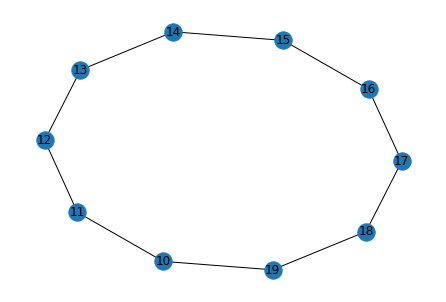

In [2]:
qubits = np.arange(10,20)
ring = arquin.ring.RingModule(qubits)
nx.draw_spring(ring.module_graph, with_labels=True)

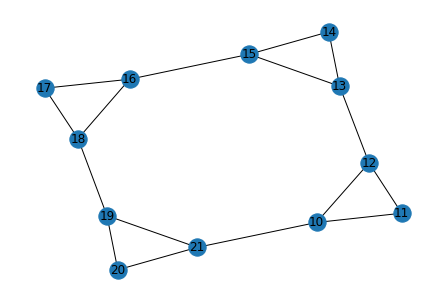

In [3]:
qubits = np.arange(10,22)
ring = arquin.ring_and_chord.RingAndChordModule(qubits, offset=2)
nx.draw_spring(ring.module_graph, with_labels=True)

# Devices

4
[6, 6, 6, 6]
{(0, 1): (3, 6), (1, 2): (9, 12), (2, 3): (15, 18), (3, 0): (21, 0)}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
24


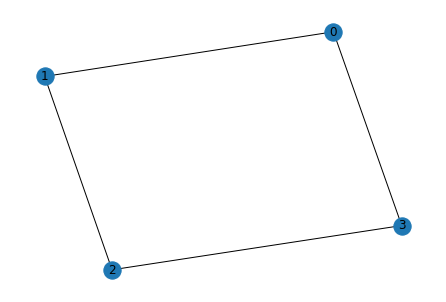

In [6]:
loop = arquin.loop.Loop(4, 6, module_offset=1)
print(len(loop.modules))
print(loop.module_sizes)
print(loop.global_edges)
print(loop.get_qubits())
print(len(loop.get_qubits()))
nx.draw_spring(loop.device_graph, with_labels=True)

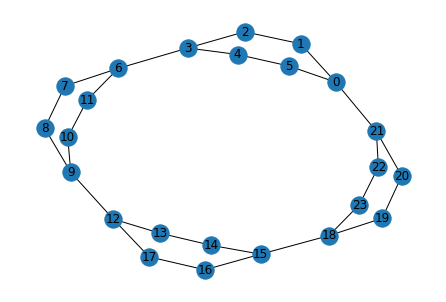

In [7]:
nx.draw_spring(loop.get_qubit_graph(), with_labels=True)